<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/%E5%8F%B0%E5%8C%96%E4%BA%8C%E9%83%A8_%E8%B3%87%E6%96%99%E6%8E%A2%E7%B4%A2%E6%80%A7%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
data_path = '/content/gdrive/My Drive/台化二部/複本 操作與品管數據(20190723提供).xlsx'
df = pd.read_excel(data_path,header=2,index_col=0)
df = df.drop_duplicates()
print(df.shape)
df.head()

(81526, 12)


,PHL-DCS-FIC1147_PV,PHL-DCS-FIC1149A_PV,PHL-DCS-TIC1163_PV,PHL-DCS-PI1162_PV,PHL-DCS-TI1166_PV,PHL-DCS-TI1167_PV,PHL-DCS-TI1168_PV,PHL-DCS-TI1169_PV,PHL-DCS-TI1170_PV,PHL-DCS-PIC1166_PV,T121 EB含量,DIPB轉化率
DATE,,,,,,,,,,,,
2013-08-20 10:10:00,31.212050,24.992781,169.893986,NaN,167.057086,166.569303,166.278953,165.041317,NaN,12.297010,NaN,NaN
2013-08-20 10:20:00,31.223557,25.066836,169.752653,NaN,167.050706,166.575684,166.259814,164.969540,NaN,12.291411,NaN,NaN
2013-08-20 10:30:00,31.572592,25.163049,169.525828,NaN,167.042458,166.583934,166.235069,164.876743,NaN,12.317545,NaN,NaN
2013-08-20 10:40:00,31.886214,25.136713,169.316875,NaN,167.034209,166.592183,166.210325,164.783946,NaN,12.317918,NaN,NaN
2013-08-20 10:50:00,31.855439,25.220729,169.665105,NaN,167.025961,166.600433,166.185580,164.691149,NaN,12.315540,NaN,NaN


# columns type transform 這裡異常值就會被np.nan取代

In [3]:
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df.dtypes

PHL-DCS-FIC1147_PV     float64
PHL-DCS-FIC1149A_PV    float64
PHL-DCS-TIC1163_PV     float64
PHL-DCS-PI1162_PV      float64
PHL-DCS-TI1166_PV      float64
PHL-DCS-TI1167_PV      float64
PHL-DCS-TI1168_PV      float64
PHL-DCS-TI1169_PV      float64
PHL-DCS-TI1170_PV      float64
PHL-DCS-PIC1166_PV     float64
T121 EB含量              float64
DIPB轉化率                float64
dtype: object

# miss value

In [4]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 12 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
DIPB轉化率,81038,99.4
T121 EB含量,79977,98.1
PHL-DCS-PI1162_PV,45775,56.1
PHL-DCS-TI1170_PV,45774,56.1
PHL-DCS-FIC1147_PV,2,0.0
PHL-DCS-FIC1149A_PV,2,0.0
PHL-DCS-TIC1163_PV,2,0.0
PHL-DCS-TI1166_PV,2,0.0
PHL-DCS-TI1167_PV,2,0.0
PHL-DCS-TI1168_PV,2,0.0


# 看看高缺值的欄位怎麼回事

In [5]:
df_index = df.index
DIPB_index = df[df['DIPB轉化率'].isnull()==False].index
T121_index = df[df['T121 EB含量'].isnull()==False].index
PI1162_index = df[df['PHL-DCS-PI1162_PV'].isnull()==False].index
TI1170_index = df[df['PHL-DCS-TI1170_PV'].isnull()==False].index	

for name,index in zip(['df_index','DIPB_index','T121_index','PI1162_index','TI1170_index'],
                      [df_index,DIPB_index,T121_index,PI1162_index,TI1170_index]):
  print(name)
  print('起始時間:{} 結束時間:{} 取樣頻率:{}'.format(index[0],index[-1],index[1]-index[0]))

df_index
起始時間:2013-08-20 10:10:00 結束時間:2015-03-19 23:50:00 取樣頻率:0 days 00:10:00
DIPB_index
起始時間:2013-08-22 00:00:00 結束時間:2015-02-17 00:00:00 取樣頻率:1 days 00:00:00
T121_index
起始時間:2013-08-20 16:00:00 結束時間:2015-03-19 16:00:00 取樣頻率:0 days 08:00:00
PI1162_index
起始時間:2014-07-14 10:40:00 結束時間:2015-03-19 23:50:00 取樣頻率:0 days 00:10:00
TI1170_index
起始時間:2014-07-14 10:30:00 結束時間:2015-03-19 23:50:00 取樣頻率:0 days 00:10:00


# 多數欄位10分鐘取樣一次,1小時就6筆,24小時就24*6 = 144筆

# DIPB 1天取樣一次所以應該跟前144筆資料有關

# T121 8小時取樣一次 6*8=48所以T121和前48筆資料有關

# PI1162和TI1170取樣頻率雖然也是10分鐘一筆 但起始時間是2014年開始,可能後來才加裝

# 查看變量彼此相關性

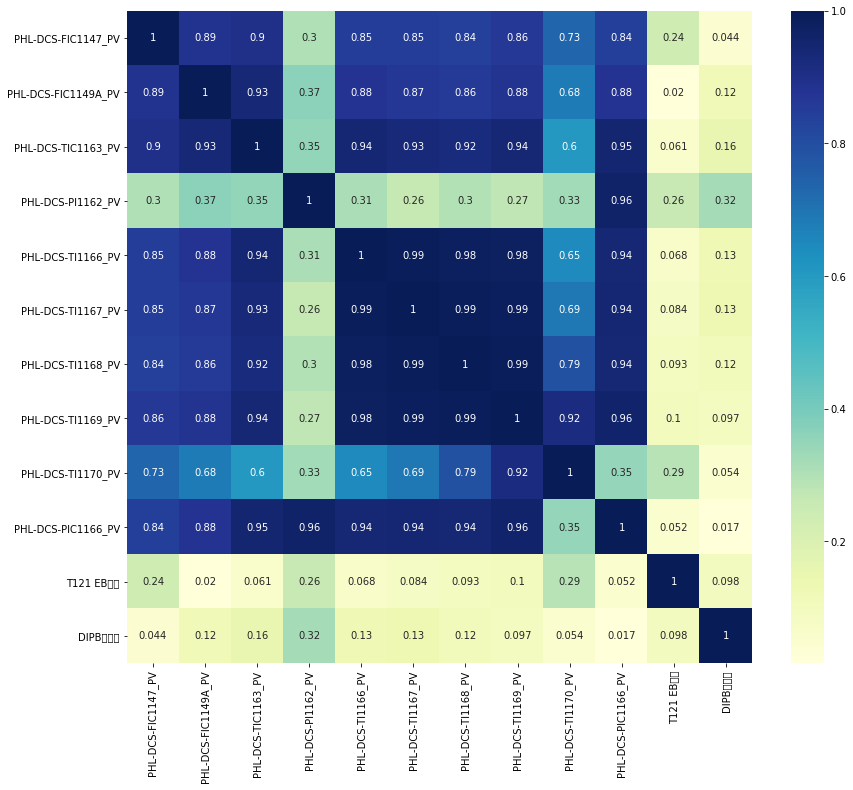

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,cmap='YlGnBu')

# 這裡看到與DIPB轉化率比較高相關係數的特徵是:PHL-DCS-PI1162_PV

# 而除了PHL-DCS-PI1162_PV和T121 EB 和DIPB 其他變量彼此都高度相關(0.8以上)

# regplot

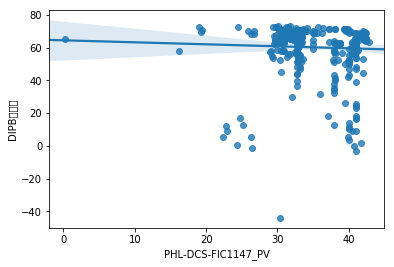

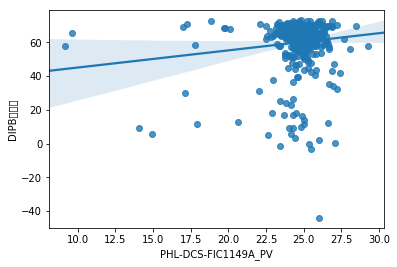

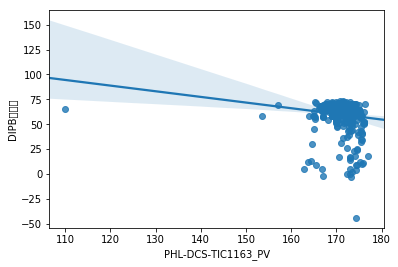

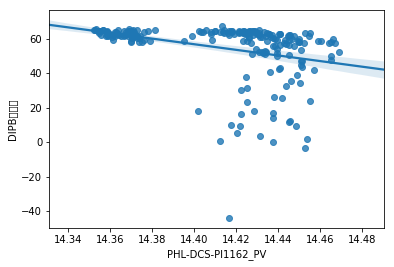

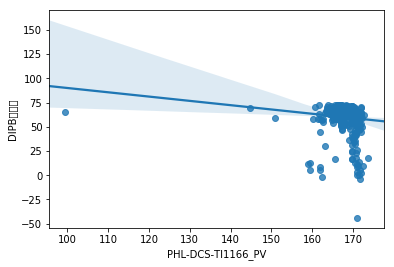

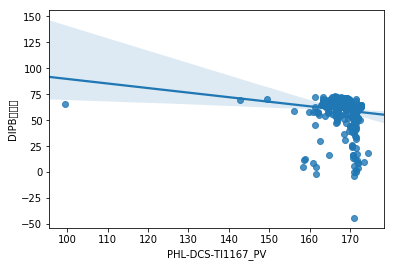

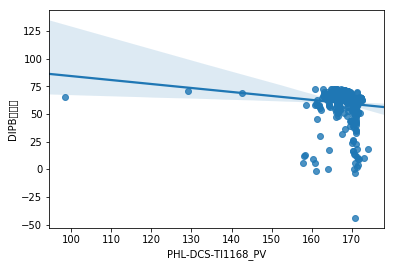

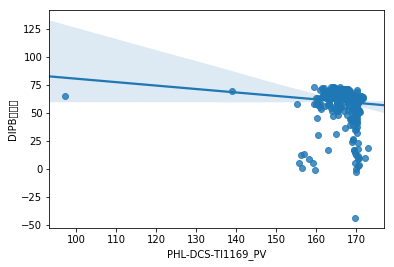

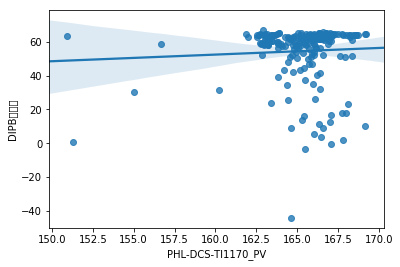

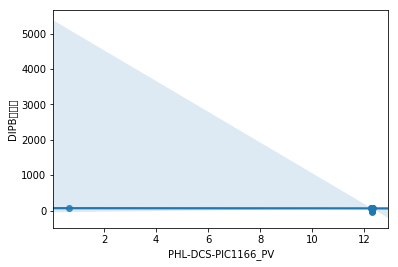

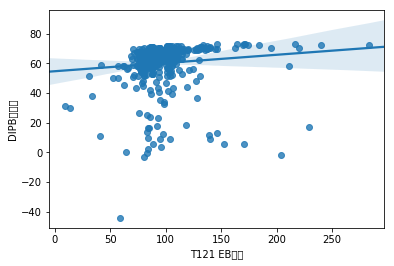

In [19]:
y_name = 'DIPB轉化率'

for i in df.drop(y_name,axis=1).columns:
  sns.regplot(df[i],df[y_name])
  plt.show()